<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Graphes_Parcours_en_largeur_(BFS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graphes - Parcours en largeur (BFS)**

Dans ce chapitre, nous allons découvrir comment déterminer le **plus court chemin** entre deux sommets dans un **graphe non pondéré**. Le chemin le plus court est celui dont la longueur est la plus faible. Il peut y avoir plusieurs plus courts chemins entre deux sommets.

Nous allons découvrir ici l'algorithme du parcours en largeur, appelé aussi **BFS** pour Breadth First Search. Celui-ci consiste à parcourir un graphe ou un arbre en partant d'un sommet source, puis ses voisins, puis les voisins non explorés des voisins, etc... afin de calculer le nombre d'arêtes qui séparent chaque sommet du sommet source.

Commençons par importer les modules nécessaires.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

En cas d'erreur sur ce bloc d'instructions, lancez l'installation des modules matplotlib et networkx, redémarrez le noyau, puis re-exécutez la dernière cellule de code.

In [ ]:
import sys  
!{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user networkx

Voici maintenant un graphe qui illustrera le propos :

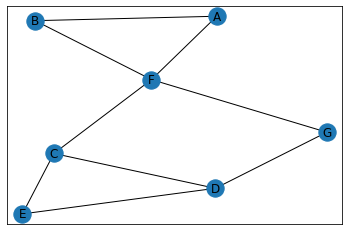

In [2]:
D = dict()
D['A'] = {'B','F'}
D['B'] = {'A','F'}
D['C'] = {'D','E','F'}
D['D'] = {'C','E','G'}
D['E'] = {'C','D'}
D['F'] = {'A','B','C','G'}
D['G'] = {'D','F'}

G = nx.Graph(D)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Admettons que l'on cherche à connaitre le plus court chemin permettant de relier le somme 'A' (appelé sommet source) à tous les autres sommets.

Nous allons résoudre ce problème en utilisante une [File](https://mybinder.org/v2/gh/GeoLabUniLaSalle/Python/HEAD?filepath=Les_files.ipynb) et en suivant la stratégie suivante :

1.   On enfile le sommet source
2.   On enfile les sommets adjacents à la ce sommet s'ils ne sont pas déjà présents dans la file
3.   On défile (on supprime la tête de la file)
4.   On répète les opérations 2. et 3. tant que la file n'est pas vide

Voici l'algorithme **BFS** appliqué à notre graphe, dans lequel nous utiliserons :
*   **P**, un dictionnnaire qui stocke les sommets qui ont été parcourus, dans l'ordre de parcours, en y associant la distance au sommet source
*   **couleur**, un dictionnaire qui stocke la couleur des sommets : 'green' pour pas encore examiné, 'orange' pour en cours d'examination, et 'red' pour plus de voisins à examiner
*   **Q**, la file qui servira à appliquer la stratégie exposée plus haut



Initialisation du noeud A qui prend la couleur 'orange' (en cours d'examination)


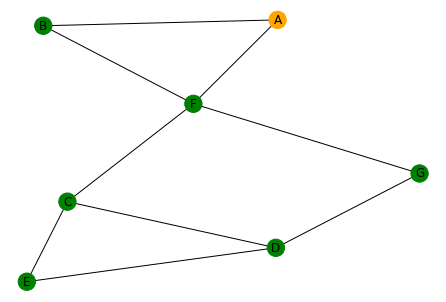

Traitement du noeud A qui a 2 voisins 'vert' (pas encore examinés). Ces voisins passent à 'orange' (en cours d'examination) et sont à une distance de 1 de A. A passe à 'rouge' (plus de voisins à examiner).


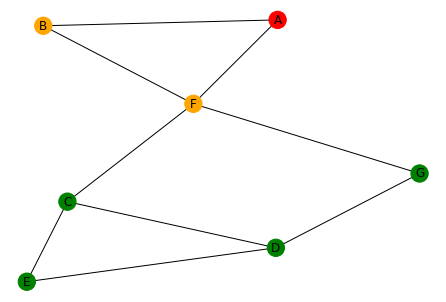

Traitement du noeud F qui a 2 voisins 'vert' (pas encore examinés). Ces voisins passent à 'orange' (en cours d'examination) et sont à une distance de 2 de A. F passe à 'rouge' (plus de voisins à examiner).


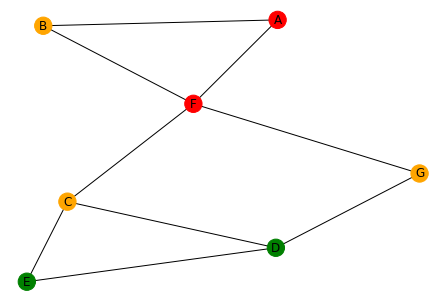

Traitement du noeud B qui a 0 voisins 'vert' (pas encore examinés). B passe à 'rouge' (plus de voisins à examiner).


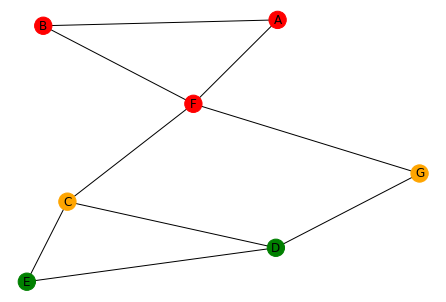

Traitement du noeud C qui a 2 voisins 'vert' (pas encore examinés). Ces voisins passent à 'orange' (en cours d'examination) et sont à une distance de 3 de A. C passe à 'rouge' (plus de voisins à examiner).


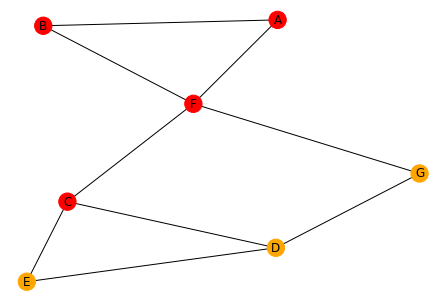

Traitement du noeud G qui a 0 voisins 'vert' (pas encore examinés). G passe à 'rouge' (plus de voisins à examiner).


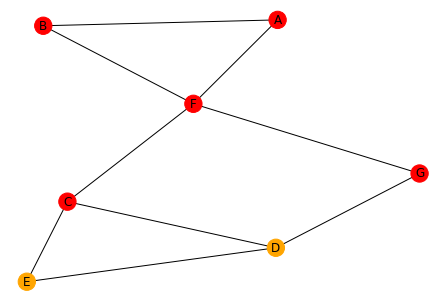

Traitement du noeud D qui a 0 voisins 'vert' (pas encore examinés). D passe à 'rouge' (plus de voisins à examiner).


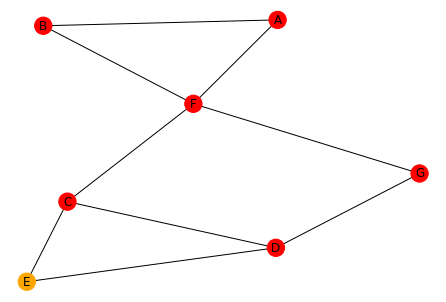

Traitement du noeud E qui a 0 voisins 'vert' (pas encore examinés). E passe à 'rouge' (plus de voisins à examiner).


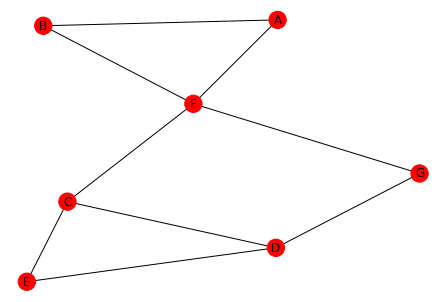

Fin du traitement : tous les sommets ont été examinés
Distances qui séparent les sommets de A : {'A': 0, 'F': 1, 'B': 1, 'C': 2, 'G': 2, 'D': 3, 'E': 3}


In [3]:
class File:
  
  def __init__(self):
    self.elements = []
    
  def enfile(self, element):
    self.elements.append(element)

  def defile(self):
    if self.elements:
      return self.elements.pop(0)
  
  def taille(self):
    return len(self.elements)

  def sommet(self):
    if len(self.elements)==0:
         raise Exception("La file est vide")
    return self.elements[0]
    
  def __str__(self):
    out = str(self.elements[0])
    for x in self.elements[1:]:
      out = str(x) + " -> " + out
    out = "File : " + out
    return out

def affiche_graphe(G,couleur):
  color_map=[]
  for i in G:
    color_map.append(couleur[i])
  nx.draw(G, pos, node_color=color_map, with_labels=True)
  plt.show()

def bfs(G, S):
  couleur = dict()
  for x in G:
    couleur[x] = 'green' # On initialise couleur à 'green' (pas encore examiné) pour tous les sommets de notre graphe
  P = {S : 0}
  couleur[S] = 'orange' # On affecte au sommet source ('A') la couleur 'orange' (en cours d'examination) pour initialiser le parcours
  Q = File()
  Q.enfile(S)

  # Affichage du graphe
  print("Initialisation du noeud A qui prend la couleur 'orange' (en cours d'examination)")
  affiche_graphe(G,couleur)

  while Q.taille()!=0 : # Tant que la file contient des sommets à examiner
    u = Q.sommet() # On examine le premier élément de la file
    voisins = 0
    for v in G[u]: # On parcourt les voisins de cet élément
      if couleur[v] == 'green': # Si le voisin porte la couleur 'green' (pas encore examiné) 
        P[v] = P[u] + 1 # On stocke le voisin parcouru et sa distance au sommet source qui est égale à la distance du sommet précédent + 1
        couleur[v] = 'orange' # On affecte à l'élément parcouru la couleur 'orange' (en cours d'examination) 
        Q.enfile(v) # On ajoute le voisin à la file
        voisins+=1

    Q.defile() # On supprime le premier élément de la file une fois que tous ses voisins ont été examinés
    couleur[u] = 'red' # On lui affecte la couleur 'red' (plus de voisins à examiner)

    # Affichage du graphe
    if(voisins!=0):
      print('Traitement du noeud',u, 'qui a', voisins, "voisins 'vert' (pas encore examinés). Ces voisins passent à 'orange' (en cours d'examination) et sont à une distance de",P[u] + 1, 'de A.',u, "passe à 'rouge' (plus de voisins à examiner).")
    else:
      print('Traitement du noeud',u, 'qui a', voisins, "voisins 'vert' (pas encore examinés).",u, "passe à 'rouge' (plus de voisins à examiner).")
    affiche_graphe(G,couleur)
  
  print('Fin du traitement : tous les sommets ont été examinés')
  return P

P = bfs(G,'A')
print("Distances qui séparent les sommets de A :",P) # On affiche tous les sommets dans l'ordre de parcours, en partant du sommet 'A', et la distance au sommet source associée

Sans les affichages explicatifs, cela donne :

In [4]:
def bfs(G, S):
  couleur = dict()
  for x in G:
    couleur[x] = 'green'
  P = {S : 0}
  couleur[S] = 'orange'
  Q = File()
  Q.enfile(S)
  while Q.taille()!=0 :
    u = Q.sommet()
    for v in G[u]:
      if couleur[v] == 'green':
        P[v] = P[u] + 1
        couleur[v] = 'orange'
        Q.enfile(v)
    Q.defile()
    couleur[u] = 'red'
  return P

P = bfs(G,'A')
print("Distances qui séparent les sommets de A :",P)

Distances qui séparent les sommets de A : {'A': 0, 'F': 1, 'B': 1, 'C': 2, 'G': 2, 'D': 3, 'E': 3}


Nous obtenons donc le plus court chemin permettant de relier chaque sommet au sommet source 'A'.

Il est possible d'utiliser une File sans se servir de la classe File, mais en utilisant une simple liste.

In [6]:
def bfs(G, S):
  couleur = dict()
  for x in G:
    couleur[x] = 'green'
  P = {S : 0}
  couleur[S] = 'orange'
  Q = [S]
  while Q:
    u = Q[0]
    for v in G[u]:
      if couleur[v] == 'green':
        P[v] = P[u] + 1
        couleur[v] = 'orange'
        Q.append(v)
    Q.pop(0)
    couleur[u] = 'red'
  return P

P = bfs(G,'A')
print("Distances qui séparent les sommets de A :",P)

Distances qui séparent les sommets de A : {'A': 0, 'F': 1, 'B': 1, 'C': 2, 'G': 2, 'D': 3, 'E': 3}


Nous pouvons également obtenir une liste des arêtes nécessaires au parcours de l'ensemble de ces chemins :

In [7]:
def bfs(G, S):
  P = {S : None}
  Q = [S]
  while Q:
    u = Q.pop(0)
    for v in G[u]:
      if v in P:
        continue
      P[v] = u
      Q.append(v)
  return P

P = bfs(G,'A')
print(P)

{'A': None, 'F': 'A', 'B': 'A', 'C': 'F', 'G': 'F', 'D': 'C', 'E': 'C'}


Nous remarquons que si l'on ne conserve que ces arêtes, cela nous donne une version simplifiée du graphe :



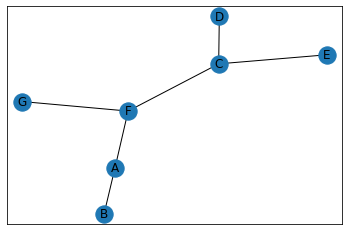

In [8]:
G = nx.Graph()

for i in P:
  if P[i]!=None:
    G.add_edge(i,P[i])

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Ce graphe est un arbre couvrant ne contenant que les arêtes utilisées pour réaliser le plus court chemin. Cette représentation nous donne la distance de chaque sommet par rapport au sommet 'A'.

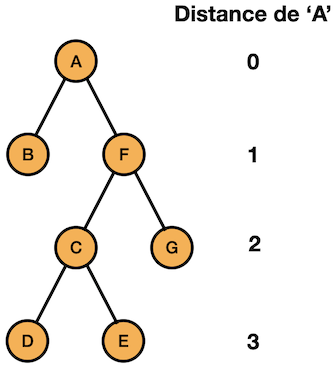

* La première ligne correspond aux sommets qui sont à une distance de 0 de 'A'.
* La seconde ligne correspond aux sommets qui sont à une distance de 1 de 'A'.
* La troisième ligne correspond aux sommets qui sont à une distance de 2 de 'A'.
* etc.

Le même résultat peut être obtenu sans recoder la fonction bfs, mais en utilisant les fonctions du module NetworkX.

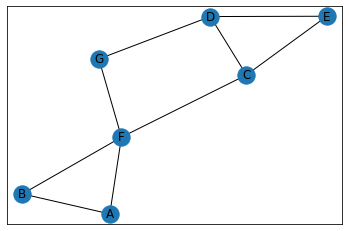

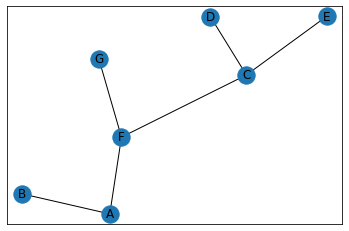

[('A', 'F'), ('A', 'B'), ('F', 'C'), ('F', 'G'), ('C', 'D'), ('C', 'E')]


In [9]:
D = dict()
D['A'] = {'B','F'}
D['B'] = {'A','F'}
D['C'] = {'D','E','F'}
D['D'] = {'C','E','G'}
D['E'] = {'C','D'}
D['F'] = {'A','B','C','G'}
D['G'] = {'D','F'}

import networkx as nx

G = nx.Graph(D)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Gbfs = nx.Graph(nx.bfs_tree(G,'A'))

nx.draw_networkx_nodes(Gbfs, pos)
nx.draw_networkx_labels(Gbfs, pos)
nx.draw_networkx_edges(Gbfs, pos)

plt.show()

print(list(nx.bfs_edges(G,'A')))

Toutes les méthodes vues ici fonctionnent aussi sur des **graphes orientés**.

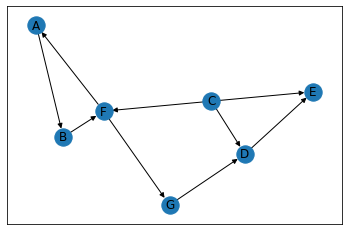

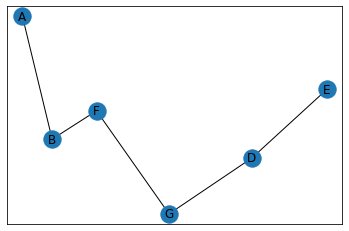

[('A', 'B'), ('B', 'F'), ('F', 'G'), ('G', 'D'), ('D', 'E')]


In [13]:
D = dict()
D['A'] = {'B'}
D['B'] = {'F'}
D['C'] = {'D','E','F'}
D['D'] = {'E'}
D['E'] = {}
D['F'] = {'A','G'}
D['G'] = {'D'}

G = nx.DiGraph(D)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Gbfs = nx.Graph(nx.bfs_tree(G,'A'))

nx.draw_networkx_nodes(Gbfs, pos)
nx.draw_networkx_labels(Gbfs, pos)
nx.draw_networkx_edges(Gbfs, pos)

plt.show()

print(list(nx.bfs_edges(G,'A')))

Notons que dans cet exemple, le sommet 'C' ne peut être atteint par aucun chemin. Il disparait alors de l'arbre obtenu.

Pour effectuer le même traitement sur un **graphe pondéré**, nous utiliserons l'**algorithme de Dijkstra** que nous verrons dans un prochain chapitre de cours.

Connaitre la méthode d'obtention du plus court chemin dans un graphe vous permettra de résoudre efficacement tous les problèmes pouvant être représentés sous la forme d'un graphe non pondéré.

